In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

### Before running the next cell ensure the below mentioned config file and the frozen model is present in the same directory as this .ipynb file

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'


In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels = []
file_name = 'labels.txt'
with open (file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    #classLabels.append(fpt.read())

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


## Read an image

### you can also use your own image, just ensure they are in the same directory as this .ipynb file.

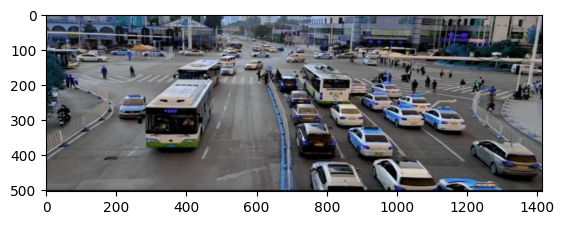

In [8]:
img = cv2.imread('41598_2023_43458_Fig1_HTML.jpg')
plt.imshow(img)

In [9]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 00000190213F9CD0>

In [10]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)


In [11]:
print(ClassIndex)

[6 3 3 3 6 1 1 1 6 3]


In [12]:
for classInd in ClassIndex:
    print(classLabels[classInd-1])

bus
car
car
car
bus
person
person
person
bus
car


In [13]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

for classInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255,0,0), 2)
    cv2.putText(img, classLabels[classInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color = (0,255,0), thickness = 3)

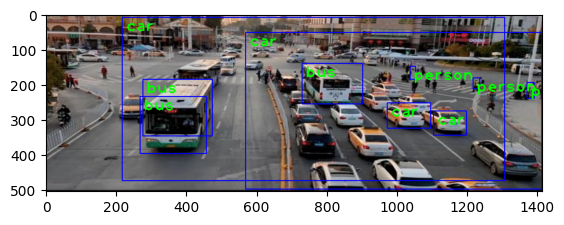

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Video Input - Please choose your own video file and replace with 'IMG_3440.mov' in the first line of the code given below and run (as video file was too large to upload)

### run below code and observe the video stream. Press 'q' to interrupt/end video stream

In [16]:
cap = cv2.VideoCapture("IMG_3440.mov")

# Check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        raise IOError("Cannot open video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    print(ClassIndex)
    if (len(ClassIndex) != 0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd <= 80):
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness = 3)

    cv2.imshow('Object Detection Tutorial', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


[1 1 1 1]
[1 1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[ 1  1  1 31]
[1 1 1]
[ 1  1  1 31]
[ 1  1  1 31]
[ 1  1  1 31]
[ 1  1  1 31]
[ 1  1  1 31]
[1 1 1]
[1 1 1]
[ 1  1  1 31]
[1 1 1]
[1 1 1 1]
[1 1 1]
[1 1 1 1]
[ 1 31  1  1]
[ 1  1 31 31  1  1]
[ 1  1 31  1]
[ 1  1  1 31]
[ 1  1 31  1]
[1 1 1]
[1 1]
[1 1]
[ 1  1 31]
[1 1]
[ 1  1 31 31]
[ 1  1 31]
[1 1]
[ 1  1 31]
[ 1  1 31]
[ 1  1 31]
[1 1]
[1]
[1]
[1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[ 1 31  1]
[1 1]
[1 1]
[1 1]
[1]
[1]
[1]
[1]
[1]


## Webcam Input - replace the '0' in the first line with '1' in the code given below if you have an external webcam attached

### run below code and observe the video stream. Press 'q' to interrupt/end live video stream

In [17]:
cap = cv2.VideoCapture(0)

# Check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        raise IOError("Cannot open webcam")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    print(ClassIndex)
    if (len(ClassIndex) != 0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd <= 80):
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness = 3)

    cv2.imshow('Object Detection Tutorial', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


()
()
()
()
()
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
